In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
# Load the dataset
data_path = '/content/Online Retail(1).csv'
data = pd.read_csv(data_path, parse_dates=['InvoiceDate'], index_col='InvoiceDate')

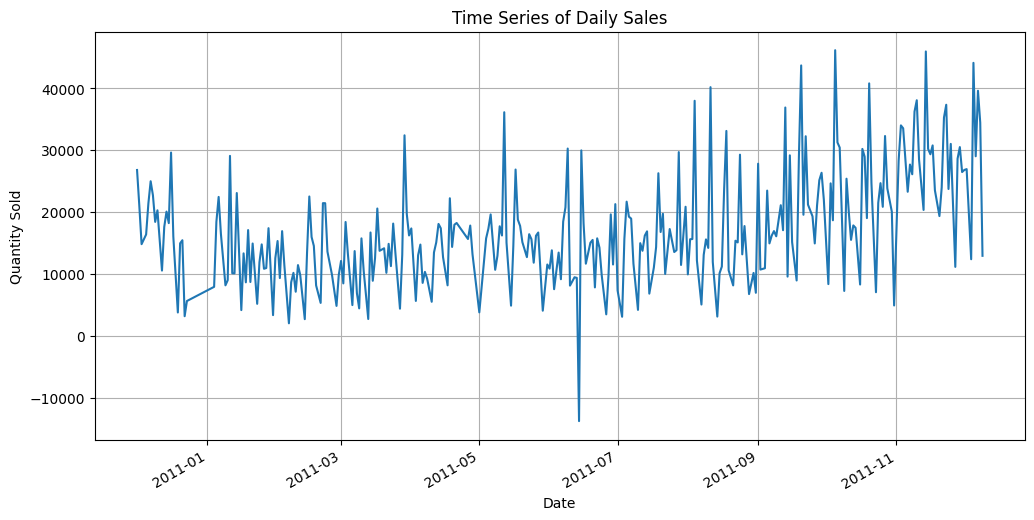

In [3]:
time_series = data.groupby(data.index.date)['Quantity'].sum()
time_series.index = pd.to_datetime(time_series.index)

plt.figure(figsize=(12, 6))
time_series.plot(title='Time Series of Daily Sales', ylabel='Quantity Sold', xlabel='Date')
plt.grid()
plt.show()


Time Series Decomposition : Decompose the series (Additive/Multiplicative) into Trend, Seasonality, and Residuals; plot and analyze each component.

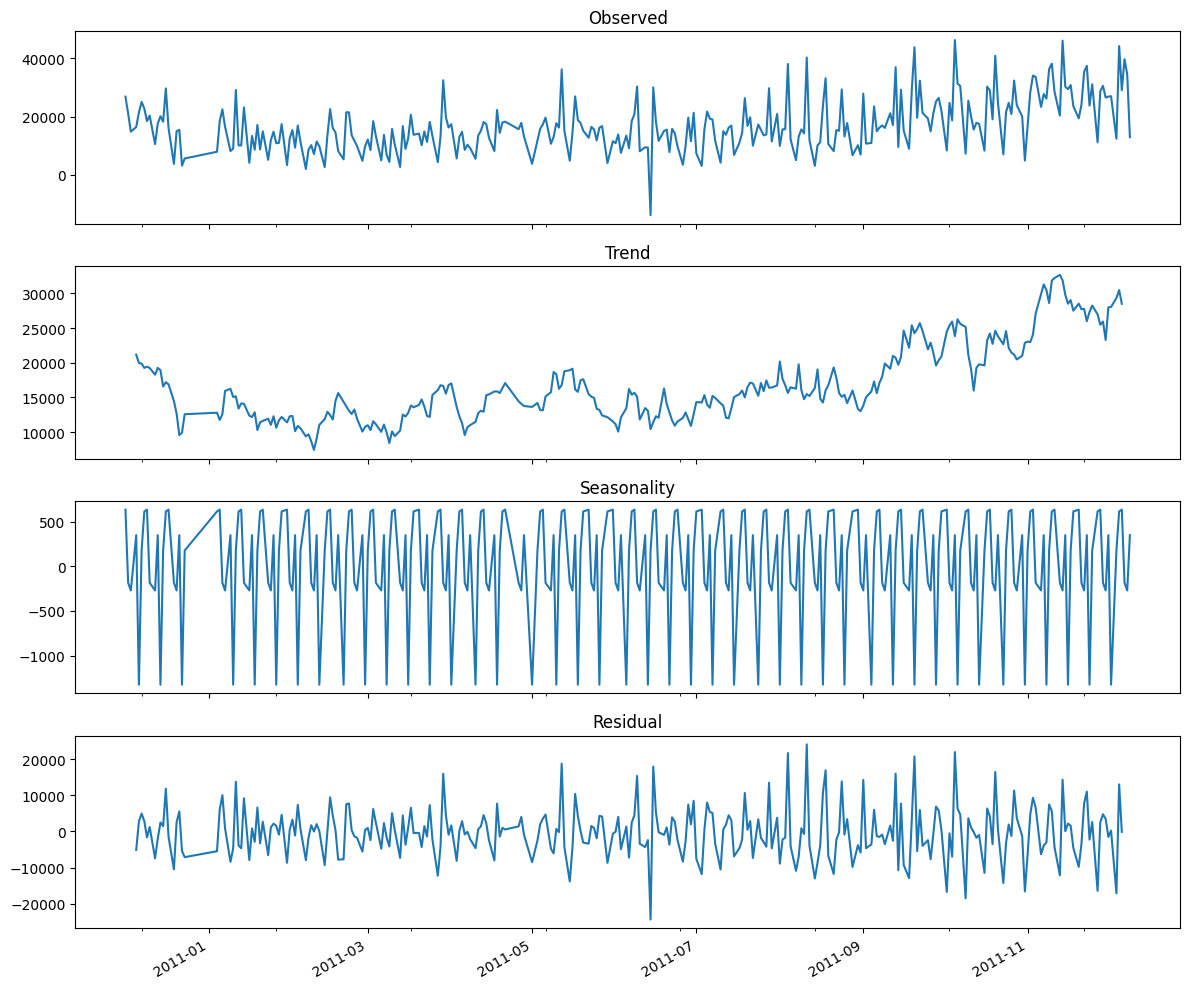

In [4]:
# Decompose the time series
decomposition = seasonal_decompose(time_series, model='additive', period=7)

# Plot decomposition
fig, axes = plt.subplots(4, 1, figsize=(12, 10), sharex=True)
decomposition.observed.plot(ax=axes[0], title='Observed')
decomposition.trend.plot(ax=axes[1], title='Trend')
decomposition.seasonal.plot(ax=axes[2], title='Seasonality')
decomposition.resid.plot(ax=axes[3], title='Residual')
plt.tight_layout()
plt.show()

Trend Estimation : Apply Simple Moving Average (SMA) and Weighted Moving Average (WMA); experiment with parameters and plot results.

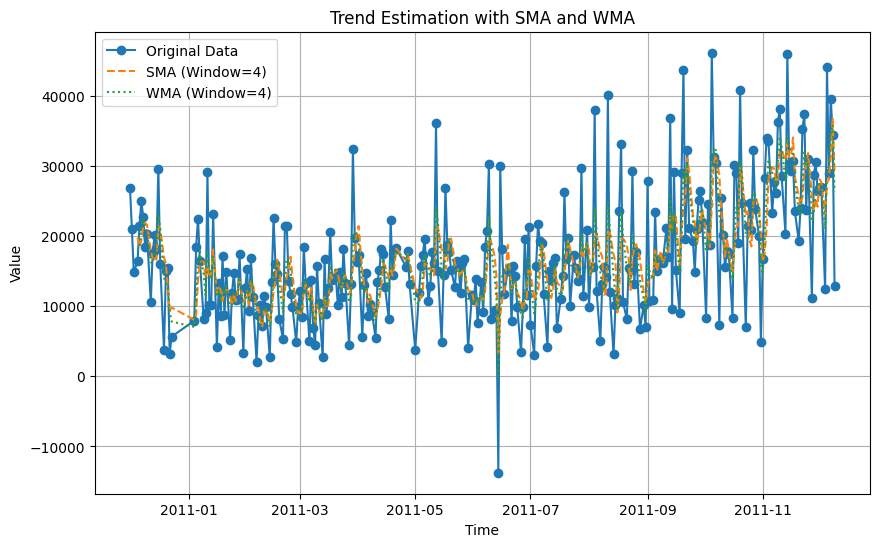

In [5]:
# Simple Moving Average (SMA) function
def calculate_sma(data, window):
    return data.rolling(window=window).mean()

# Weighted Moving Average (WMA) function
def calculate_wma(data, window):
    weights = np.arange(1, window + 1)
    return data.rolling(window=window).apply(lambda x: np.dot(x, weights) / weights.sum(), raw=True)

# Parameters
window_size = 4

# Calculate SMA and WMA
sma = calculate_sma(time_series, window_size)
wma = calculate_wma(time_series, window_size)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(time_series, label="Original Data", marker="o")
plt.plot(sma, label=f"SMA (Window={window_size})", linestyle="--")
plt.plot(wma, label=f"WMA (Window={window_size})", linestyle=":")
plt.title("Trend Estimation with SMA and WMA")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid()
plt.show()

Exponential Smoothing : Use Single (SES), Double (Holt’s Linear Trend), and Triple (Holt-Winters) Exponential Smoothing; tune parameters and evaluate effectiveness.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
<

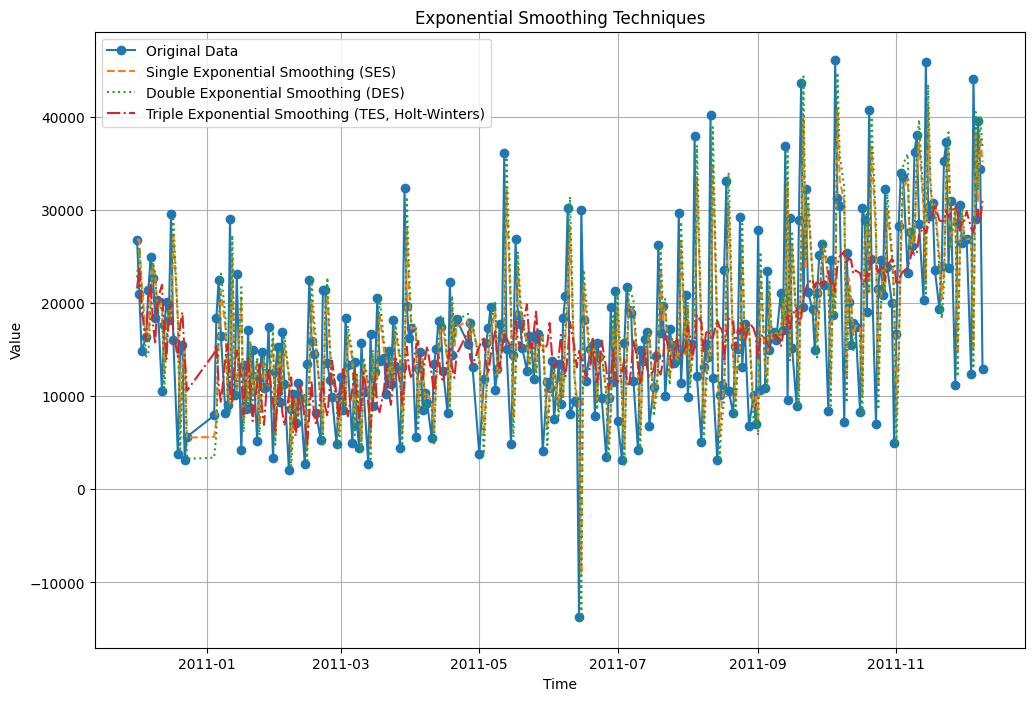

SES Forecast: 305    17387.52005
306    17387.52005
307    17387.52005
dtype: float64
DES Forecast: 305    15000.909612
306    12303.514255
307     9606.118897
dtype: float64
TES Forecast: 305    29241.826674
306    30706.147540
307    28499.349663
dtype: float64


In [6]:
# 1. Single Exponential Smoothing (SES)
def single_exponential_smoothing(data, smoothing_level=0.8):
    model = SimpleExpSmoothing(data)
    fitted_model = model.fit(smoothing_level=smoothing_level, optimized=False)
    return fitted_model.fittedvalues, fitted_model.forecast(steps=3)

# 2. Double Exponential Smoothing (DES)
def double_exponential_smoothing(data, trend="add", smoothing_level=0.8, smoothing_slope=0.2):
    model = ExponentialSmoothing(data, trend=trend, seasonal=None)
    fitted_model = model.fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, optimized=False)
    return fitted_model.fittedvalues, fitted_model.forecast(steps=3)

# 3. Triple Exponential Smoothing (Holt-Winters, TES)
def triple_exponential_smoothing(data, trend="add", seasonal="add", seasonal_periods=4):
    model = ExponentialSmoothing(data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_periods)
    fitted_model = model.fit(optimized=True)
    return fitted_model.fittedvalues, fitted_model.forecast(steps=3)

# Apply smoothing methods
smoothing_level = 0.8
smoothing_slope = 0.2
seasonal_periods = 4

ses_fitted, ses_forecast = single_exponential_smoothing(time_series, smoothing_level)
des_fitted, des_forecast = double_exponential_smoothing(time_series, "add", smoothing_level, smoothing_slope)
tes_fitted, tes_forecast = triple_exponential_smoothing(time_series, "add", "add", seasonal_periods=seasonal_periods)

# Plotting
plt.figure(figsize=(12, 8))
plt.plot(time_series, label="Original Data", marker="o")
plt.plot(ses_fitted, label="Single Exponential Smoothing (SES)", linestyle="--")
plt.plot(des_fitted, label="Double Exponential Smoothing (DES)", linestyle=":")
plt.plot(tes_fitted, label="Triple Exponential Smoothing (TES, Holt-Winters)", linestyle="-.")
plt.title("Exponential Smoothing Techniques")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid()
plt.show()

# Forecast Output
print("SES Forecast:", ses_forecast)
print("DES Forecast:", des_forecast)
print("TES Forecast:", tes_forecast)

Forecasting with AR, ARIMA, SARIMA : Fit ARIMA/SARIMA models, tune parameters (p, d, q, P, D, Q, s), forecast future values, and plot results

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


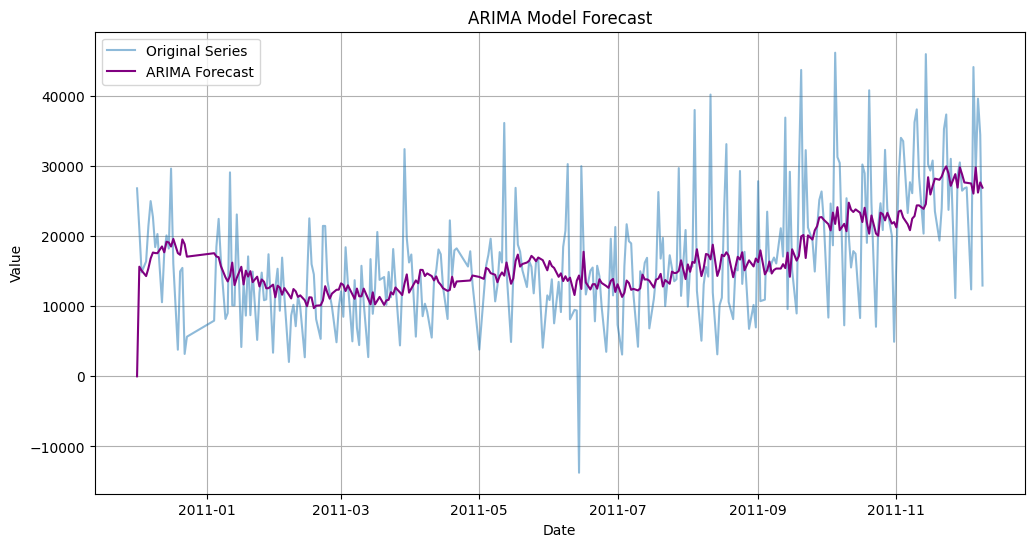

In [7]:
arima_model = ARIMA(time_series, order=(2, 1, 2)).fit()
arima_forecast = arima_model.fittedvalues

plt.figure(figsize=(12, 6))
plt.plot(time_series, label='Original Series', alpha=0.5)
plt.plot(arima_forecast, label='ARIMA Forecast', color='purple')
plt.title('ARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

In [8]:
mae = mean_absolute_error(time_series[1:], arima_forecast[1:])
rmse = np.sqrt(mean_squared_error(time_series[1:], arima_forecast[1:]))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 5642.314518443413
Root Mean Squared Error (RMSE): 7641.333247016945
